Moment:   0%|          | 0/6435 [00:00<?, ?it/s]

MLE:   0%|          | 0/6435 [00:00<?, ?it/s]

Kernel reflect:   0%|          | 0/6435 [00:00<?, ?it/s]

Kernel logit:   0%|          | 0/6435 [00:00<?, ?it/s]

Moment: (1.0066172407107643, 1.0289498560319341)
MLE: (0.9911156612341879, 1.0094017535918554)


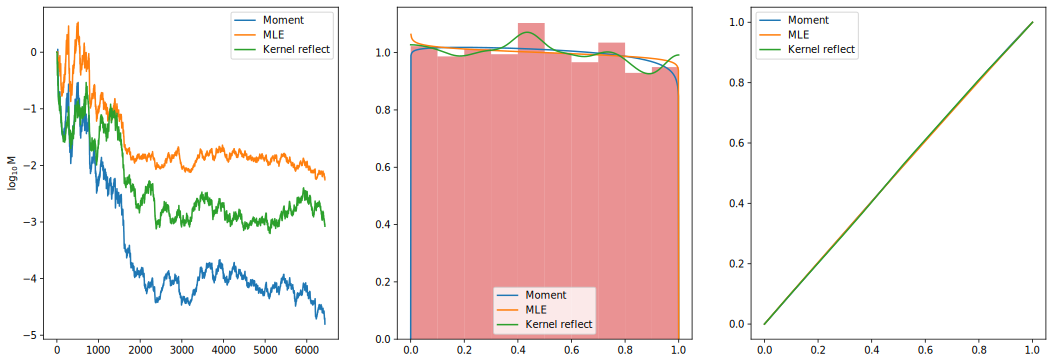

In [21]:
from online_cp import PluginMartingale
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
from matplotlib_inline.backend_inline import set_matplotlib_formats
# Set the desired output format
set_matplotlib_formats('svg')
from tqdm.notebook import tqdm
from scipy.stats import beta

martingale_mom = PluginMartingale(warnings=False, method='beta', beta_method='moment', min_sample_size=20)
martingale_mle = PluginMartingale(warnings=False, method='beta', beta_method='mle', min_sample_size=20)

bandwidth='silverman'
martingale_gaussian_kernel_reflect = PluginMartingale(warnings=False, method='kernel', kernel_method='reflect', bandwidth=bandwidth)#, min_sample_size=3)
martingale_gaussian_kernel_logit = PluginMartingale(warnings=False, method='kernel', kernel_method='logit', edge_adjustment=0.01, bandwidth=bandwidth)# min_sample_size=3)


p_values = np.load('data_martingale_experiment/p_values_satelite_shuffle.npy')
# a = 1
# b = 1
# np.random.seed(2024)
# p_values = np.random.beta(a, b, size=1000)

mom_protection = []
mle_protection = []
reflect_protection = []
logit_protection = []

for p in tqdm(p_values, desc='Moment'):
    martingale_mom.update_martingale_value(p)
    mom_protection.append(martingale_mom.B_n(p))
for p in tqdm(p_values, desc='MLE'):
    martingale_mle.update_martingale_value(p)
    mle_protection.append(martingale_mle.B_n(p))
for p in tqdm(p_values, desc='Kernel reflect'):
    martingale_gaussian_kernel_reflect.update_martingale_value(p)
    reflect_protection.append(martingale_gaussian_kernel_reflect.B_n(p))
for p in tqdm(p_values, desc='Kernel logit'):
    martingale_gaussian_kernel_logit.update_martingale_value(p)
    logit_protection.append(martingale_gaussian_kernel_logit.B_n(p))

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
axs[0].plot(martingale_mom.log10_martingale_values, label='Moment')
axs[0].plot(martingale_mle.log10_martingale_values, label='MLE')
axs[0].plot(martingale_gaussian_kernel_reflect.log10_martingale_values, label='Kernel reflect')
# axs[0].plot(martingale_gaussian_kernel_logit.log10_martingale_values, label='Kernel logit')

axs[0].set_ylabel(r'$\log_{10}M$')
axs[0].legend()

prange = np.linspace(0, 1, num=1000)
axs[1].plot(
    prange,
    martingale_mom.b_n(prange),
    label='Moment'
)
axs[1].plot(
    prange,
    martingale_mle.b_n(prange),
    label='MLE'
)
axs[1].plot(
    prange,
    martingale_gaussian_kernel_reflect.b_n(prange),
    label='Kernel reflect'
)
# axs[1].plot(
#     prange,
#     martingale_gaussian_kernel_logit.b_n(prange),
#     label='Kernel logit'
# )
# axs[1].plot(prange, beta.pdf(prange, a, b), label='True PDF', color='red', linestyle='--')
axs[1].hist(p_values, density=True, alpha=0.5)
axs[1].legend()

axs[2].plot(
    prange,
    martingale_mom.B_n(prange),
    label='Moment'
)
axs[2].plot(
    prange,
    martingale_mle.B_n(prange),
    label='MLE'
)
axs[2].plot(
    prange,
    martingale_gaussian_kernel_reflect.B_n(prange),
    label='Kernel reflect'
)
# axs[2].plot(
#     prange,
#     martingale_gaussian_kernel_logit.B_n(prange),
#     label='Kernel logit'
# )
# axs[2].plot(prange, beta.cdf(prange, a, b), label='True CDF', color='red', linestyle='--')
axs[2].legend()

print(f'Moment: {martingale_mom.ahat, martingale_mom.bhat}')
print(f'MLE: {martingale_mle.ahat, martingale_mle.bhat}')

### Just a very brief look at the protected p-values
Particularly the kernel martingales seem to be able to push the p-values towards uniformity.

It will be very difficult to give any sort of finite sample guarantees for this protection procedure, as it relies on the precision of the density estimates. It really has nothing to do with the martingale value.

However, if we also run a calibration martingale, the value of that says something about uniformity of the protected p-values.

Moment:   0%|          | 0/9298 [00:00<?, ?it/s]

MLE:   0%|          | 0/9298 [00:00<?, ?it/s]

Kernel reflect:   0%|          | 0/9298 [00:00<?, ?it/s]

Kernel logit:   0%|          | 0/9298 [00:00<?, ?it/s]

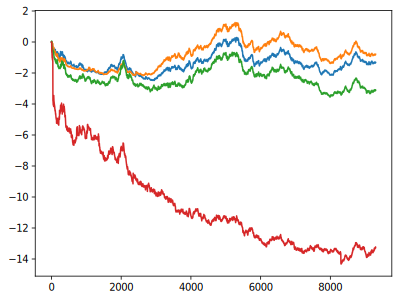

In [2]:
martingale_mom = PluginMartingale(warnings=False, method='beta', beta_method='moment')#, min_sample_size=20)
martingale_mle = PluginMartingale(warnings=False, method='beta', beta_method='mle')#, min_sample_size=20)

bandwidth='silverman'
martingale_gaussian_kernel_reflect = PluginMartingale(warnings=False, method='kernel', kernel_method='reflect', bandwidth=bandwidth)#, min_sample_size=3)
martingale_gaussian_kernel_logit = PluginMartingale(warnings=False, method='kernel', kernel_method='logit', edge_adjustment=0.001, bandwidth=bandwidth)# min_sample_size=3)

P = mom_protection

for p in tqdm(P, desc='Moment'):
    martingale_mom.update_martingale_value(p)
for p in tqdm(P, desc='MLE'):
    martingale_mle.update_martingale_value(p)
for p in tqdm(P, desc='Kernel reflect'):
    martingale_gaussian_kernel_reflect.update_martingale_value(p)
for p in tqdm(P, desc='Kernel logit'):
    martingale_gaussian_kernel_logit.update_martingale_value(p)

plt.plot(martingale_mom.log10_martingale_values)
plt.plot(martingale_mle.log10_martingale_values)
plt.plot(martingale_gaussian_kernel_reflect.log10_martingale_values)
plt.plot(martingale_gaussian_kernel_logit.log10_martingale_values)

(array([1.22075239, 1.070175  , 1.04328618, 0.99488631, 1.03253065,
        1.00026407, 1.20999686, 0.94110867, 1.00564183, 1.11857487,
        0.96799749, 0.86581997, 1.1293304 , 0.9518642 , 0.96261972,
        1.08630829, 0.92497538, 0.9357309 , 1.01639736, 1.05404171,
        1.04328618, 0.96799749, 1.00564183, 1.04866394, 1.07555276,
        0.92497538, 0.94110867, 1.070175  , 1.05404171, 0.85506445,
        0.94648643, 1.03253065, 1.08093053, 0.98413078, 1.03790842,
        0.82817563, 0.96799749, 0.91421985, 1.01639736, 1.0110196 ,
        0.99488631, 0.9518642 , 0.94648643, 0.94110867, 1.04328618,
        0.95724196, 1.06479724, 0.93035314, 0.86581997, 0.96799749]),
 array([2.89308768e-05, 2.00279517e-02, 4.00269726e-02, 6.00259934e-02,
        8.00250143e-02, 1.00024035e-01, 1.20023056e-01, 1.40022077e-01,
        1.60021098e-01, 1.80020119e-01, 2.00019139e-01, 2.20018160e-01,
        2.40017181e-01, 2.60016202e-01, 2.80015223e-01, 3.00014244e-01,
        3.20013264e-01, 3.4001

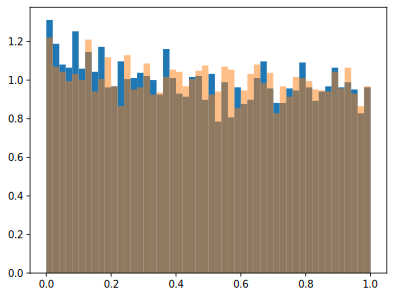

In [40]:
plt.hist(p_values, density=True, bins=50)
plt.hist(reflect_protection, density=True, alpha=0.5, bins=50)

# Bayes

### Try online Bayes with Gamma prior

Moment matching approximation update

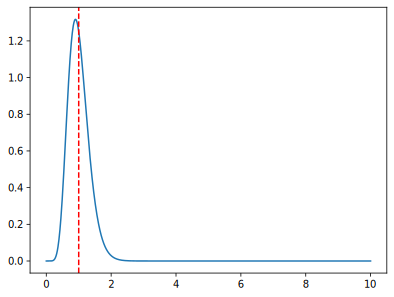

In [7]:
import numpy as np
from scipy.stats import beta, gamma
import matplotlib.pyplot as plt

# Generate some example data (e.g., 100 samples from a Beta distribution)
np.random.seed(42)
p_values = np.random.beta(a=2, b=5, size=1000)

# NOTE
# Prior for alpha
prior_value = 10
alpha_0 = prior_value
beta_0 = prior_value
# Prior for beta
gamma_0 = prior_value
delta_0 = prior_value

x = np.linspace(0, 10, num=1000)
plt.plot(
    x,
    gamma.pdf(x, a=alpha_0, scale=1/beta_0)
)
plt.axvline(alpha_0/beta_0, linestyle='--', color='red')

# Nice but too slow...

In [27]:
import cmdstanpy
import numpy as np

# Generate synthetic data from a Beta distribution
np.random.seed(42)
alpha_true = 1
beta_true = 1
data = np.random.beta(alpha_true, beta_true, size=10)

# Save the updated Stan model code to a .stan file
stan_model_code = """
data {
    int<lower=0> N;       // number of data points
    array[N] real x;      // observed data (updated syntax)
}
parameters {
    real<lower=0> alpha;  // parameter alpha
    real<lower=0> beta;   // parameter beta
}
model {
    alpha ~ gamma(1, 1);  // prior for alpha
    beta ~ gamma(1, 1);   // prior for beta
    x ~ beta(alpha, beta); // likelihood
}
"""
with open("beta_model.stan", "w") as f:
    f.write(stan_model_code)

# Define the data dictionary for Stan
data_dict = {
    'N': len(data),
    'x': data
}

# Compile the Stan model using CmdStanPy
model = cmdstanpy.CmdStanModel(stan_file="beta_model.stan")

# Sample from the posterior distribution using MCMC
fit = model.sample(data=data_dict, iter_sampling=2000, chains=4)


23:28:21 - cmdstanpy - INFO - compiling stan file /home/johan/Documents/PhD/PREMACOP/OnlineConformalPrediction/beta_model.stan to exe file /home/johan/Documents/PhD/PREMACOP/OnlineConformalPrediction/beta_model
23:28:27 - cmdstanpy - INFO - compiled model executable: /home/johan/Documents/PhD/PREMACOP/OnlineConformalPrediction/beta_model
23:28:27 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

23:28:27 - cmdstanpy - INFO - CmdStan done processing.
23:28:27 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'beta_model.stan', line 11, column 4 to column 24)
Consider re-running with show_console=True if the above output is unclear!


In [28]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-2.813550,0.018308,1.008830,-4.839750,-2.499140,-1.83779,3036.26,23720.8,1.00079
alpha,0.906864,0.005952,0.336064,0.442307,0.859285,1.53835,3188.32,24908.7,1.00198
beta,1.132020,0.007901,0.440652,0.531427,1.063960,1.92546,3110.63,24301.8,1.00166


# Good for batch, but too slow.

In [48]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import logging

# Suppress PyMC's verbose output
logging.getLogger('pymc').setLevel(logging.WARNING)

# Generate synthetic data from a Beta distribution
np.random.seed(42)
alpha_true = 1
beta_true = 1
data = np.random.beta(alpha_true, beta_true, size=10)

# Define a probabilistic model using PyMC
with pm.Model() as model:
    # Priors for alpha and beta
    alpha = pm.Gamma('alpha', alpha=1, beta=1)  # Prior for alpha
    beta = pm.Gamma('beta', alpha=1, beta=1)    # Prior for beta

    # Likelihood (the data is assumed to come from a Beta distribution)
    likelihood = pm.Beta('x', alpha=alpha, beta=beta, observed=data)

    # Sample using MCMC (NUTS) with minimal output
    trace = pm.sample(2000, chains=4, tune=1000, target_accept=0.95, progressbar=False, return_inferencedata=False)

# Extract posterior means
alpha_mean = trace['alpha'].mean()
beta_mean = trace['beta'].mean()

# Print posterior means
print(f"Posterior mean of alpha: {alpha_mean}")
print(f"Posterior mean of beta: {beta_mean}")


Posterior mean of alpha: 0.9089466469727624
Posterior mean of beta: 1.145822018227053


# Nice but too slow...

In [21]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import logging

# Suppress PyMC's verbose output
logging.getLogger('pymc').setLevel(logging.WARNING)

# Initialize parameters for the prior (Gamma distribution for alpha and beta)
alpha_prior = 1.0  # shape parameter for alpha
beta_prior = 1.0   # shape parameter for beta

# Define a function to perform online updates
def online_update(data_point, alpha_prior, beta_prior):
    with pm.Model() as model:
        # Priors for alpha and beta, updated with each new observation
        alpha = pm.Gamma('alpha', alpha=alpha_prior, beta=1)  # Prior for alpha
        beta = pm.Gamma('beta', alpha=beta_prior, beta=1)    # Prior for beta

        # Likelihood (data_point is assumed to come from a Beta distribution)
        likelihood = pm.Beta('x', alpha=alpha, beta=beta, observed=data_point)

        # Sample using MCMC (NUTS) with minimal output
        trace = pm.sample(2000, chains=4, tune=1000, target_accept=0.95, progressbar=False, return_inferencedata=False)

    # Extract posterior means (for alpha and beta)
    alpha_mean = trace['alpha'].mean()
    beta_mean = trace['beta'].mean()

    return alpha_mean, beta_mean

# Example: Simulating streaming data
np.random.seed(42)
stream_data = np.random.beta(1, 1, size=10)  # Simulated streaming data

# Initial alpha and beta from prior
alpha_post = alpha_prior
beta_post = beta_prior

# Iterate over the streaming data and update the model
for data_point in stream_data:
    alpha_post, beta_post = online_update(data_point, alpha_post, beta_post)
    print(f"Updated posterior: alpha={alpha_post:.2f}, beta={beta_post:.2f}")


Updated posterior: alpha=1.24, beta=1.24
Updated posterior: alpha=0.66, beta=1.83
Updated posterior: alpha=0.39, beta=2.25
Updated posterior: alpha=1.05, beta=1.91
Updated posterior: alpha=1.28, beta=2.10
Updated posterior: alpha=1.86, beta=1.87
Updated posterior: alpha=2.55, beta=1.32
Updated posterior: alpha=2.22, beta=1.90
Updated posterior: alpha=1.77, beta=2.60
Updated posterior: alpha=2.69, beta=1.18


In [20]:
import numpy as np

def natural_gradient_update(alpha, beta, log_obs, eta):
    """
    Natural gradient update for Gamma parameters.

    Parameters:
    - alpha, beta: current Gamma parameters (shape, rate)
    - log_obs: contribution from data (e.g., log(X_i) or log(1 - X_i))
    - eta: learning rate for the update

    Returns:
    - updated_alpha, updated_beta: posterior Gamma parameters
    """
    # Update alpha (shape parameter)
    delta_alpha = eta * log_obs
    updated_alpha = alpha + delta_alpha

    # Update beta (rate parameter)
    delta_beta = eta * (-alpha / beta**2)
    updated_beta = beta + delta_beta

    # Ensure positivity
    updated_alpha = max(updated_alpha, 1e-6)
    updated_beta = max(updated_beta, 1e-6)

    return updated_alpha, updated_beta


# Example usage
alpha_a, beta_a = 2.0, 2.0  # Gamma prior for a
alpha_b, beta_b = 2.0, 2.0  # Gamma prior for b
X_i = 0.7  # Observation
eta = 0.1  # Learning rate

np.random.seed(42)
p_values = np.random.beta(a=2, b=5, size=1000)

for p in p_values:
    X_i = p
    # Log-likelihood contributions
    log_x = np.log(X_i)  # Contribution for a
    log_1_x = np.log(1 - X_i)  # Contribution for b

    # Update parameters for a
    alpha_a, beta_a = natural_gradient_update(alpha_a, beta_a, log_x, eta)

    # Update parameters for b
    alpha_b, beta_b = natural_gradient_update(alpha_b, beta_b, log_1_x, eta)

    print("Updated alpha_a, beta_a:", alpha_a, beta_a)
    print("Updated alpha_b, beta_b:", alpha_b, beta_b)
print(alpha_a / beta_a)

Updated alpha_a, beta_a: 1.8960627819104525 1.95
Updated alpha_b, beta_b: 1.9563544630175005 1.95
Updated alpha_a, beta_a: 1.7568549024674174 1.9001364159918355
Updated alpha_b, beta_b: 1.927778329049681 1.8985508359495726
Updated alpha_a, beta_a: 1.6691380653372063 1.8514770627319286
Updated alpha_b, beta_b: 1.8739999047816887 1.8450682210181772
Updated alpha_a, beta_a: 1.4858596517899676 1.8027852896625993
Updated alpha_b, beta_b: 1.856568426015334 1.7900198202038111
Updated alpha_a, beta_a: 1.4261274072122718 1.757067020691918
Updated alpha_b, beta_b: 1.7766547303633642 1.7320775801956687
Updated alpha_a, beta_a: 1.2062555968371547 1.7108734353521353
Updated alpha_b, beta_b: 1.7648950802036125 1.6728575866129622
Updated alpha_a, beta_a: 1.1389008731416 1.669663344190302
Updated alpha_b, beta_b: 1.6935811827033227 1.6097907638959632
Updated alpha_a, beta_a: 0.9658929587105679 1.6288099541519945
Updated alpha_b, beta_b: 1.6740684165622157 1.5444375188355197
Updated alpha_a, beta_a: 0.

In [22]:
import numpy as np
import probnum as pn
from probnum import randprocs
from probnum.filtsmooth import KalmanFilter
from probnum import randvars

# Step 1: Initialize Prior Distributions for Parameters a and b
# Let's say we want to estimate two parameters of a Beta distribution
# using Gamma priors for a and b.
# Initialize a Gamma prior for parameter `a` and `b` (shape and rate parameters)
alpha_a = 2.0  # Prior shape for a
beta_a = 2.0   # Prior rate for a
alpha_b = 2.0  # Prior shape for b
beta_b = 2.0   # Prior rate for b

# Step 2: Define the Gamma distribution for the priors of `a` and `b`
gamma_a = pn.randvars.Gamma(alpha_a, beta_a)
gamma_b = pn.randvars.Gamma(alpha_b, beta_b)

# Step 3: Initialize Kalman Filter for Online Updates (Optional)
# Kalman filter is useful for sequential updates.
# We're using a simple example of two parameters, but the Kalman filter can be extended for more complex models.
kf = KalmanFilter(dim_state=2, dim_obs=1)

# Step 4: Define a Simple Model Update Rule
# Suppose we observe data `X_i` drawn from a Beta distribution, and we want to update the parameters `a` and `b`.
def update_gammas(obs, gamma_a, gamma_b, learning_rate=0.1):
    """
    Update the Gamma priors based on a new observation `obs` (streaming data).
    
    Args:
    - obs: A new data point (e.g., drawn from a Beta distribution).
    - gamma_a: Current Gamma prior for parameter a.
    - gamma_b: Current Gamma prior for parameter b.
    - learning_rate: The learning rate for the update.
    
    Returns:
    - Updated gamma_a and gamma_b distributions.
    """
    # Observation update rule (simplified)
    log_x = np.log(obs)  # For parameter `a`
    log_1_x = np.log(1 - obs)  # For parameter `b`
    
    # Update gamma distributions using natural gradients (example update rules)
    alpha_a_new = gamma_a.shape + learning_rate * log_x
    beta_a_new = gamma_a.rate + learning_rate * (gamma_a.shape / gamma_a.rate**2)
    
    alpha_b_new = gamma_b.shape + learning_rate * log_1_x
    beta_b_new = gamma_b.rate + learning_rate * (gamma_b.shape / gamma_b.rate**2)
    
    # Return updated Gamma distributions
    gamma_a_updated = pn.randvars.Gamma(alpha_a_new, beta_a_new)
    gamma_b_updated = pn.randvars.Gamma(alpha_b_new, beta_b_new)
    
    return gamma_a_updated, gamma_b_updated

# Step 5: Simulate Online Data Stream and Update Parameters
# Let's assume we have a stream of data (X_i values) from a Beta distribution.
# We will update our priors as new data arrives.

# Simulated online stream of data points (Beta distributed data points between 0 and 1)
data_stream = np.random.beta(2, 5, 100)  # 100 observations drawn from Beta(2, 5)

# Process each data point online
for i, X_i in enumerate(data_stream):
    # Update the Gamma priors for `a` and `b` with the new observation
    gamma_a, gamma_b = update_gammas(X_i, gamma_a, gamma_b, learning_rate=0.1)
    
    # Print updated parameters after each observation
    print(f"Iteration {i+1}:")
    print(f"Updated Gamma distribution for `a`: Shape = {gamma_a.shape}, Rate = {gamma_a.rate}")
    print(f"Updated Gamma distribution for `b`: Shape = {gamma_b.shape}, Rate = {gamma_b.rate}")
    print("-" * 50)



/home/johan/miniconda3/envs/onlineCP/lib/python3.11/site-packages/probnum/randprocs/covfuncs/_covariance_linear_operator.py:16: UserWarning: KeOps is not installed and currently unavailable for Windows.This may prevent scaling to large datasets.
  warnings.warn(


ImportError: cannot import name 'KalmanFilter' from 'probnum.filtsmooth' (/home/johan/miniconda3/envs/onlineCP/lib/python3.11/site-packages/probnum/filtsmooth/__init__.py)